In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer # tfidf
from sklearn.metrics.pairwise import linear_kernel # 코사인 유사도
from konlpy.tag import Okt # 토큰화
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from soynlp.normalizer import emoticon_normalize, repeat_normalize
import soynlp.tokenizer
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers
import keras.utils
import sklearn.metrics as metrics
from konlpy.tag import Komoran
# from pykospacing import spacing
# from hanspell import spell_checker



C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or '1ty

In [2]:
data = pd.read_csv("data/train.hate.csv")
data

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,hate
...,...,...
7891,힘내세요~ 응원합니다!!,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,none


In [3]:
data2 = pd.read_csv("data/dev.hate.csv")
data2

,comments,label
0,송중기 시대극은 믿고본다. 첫회 신선하고 좋았다.,none
1,지현우 나쁜놈,offensive
2,알바쓰고많이만들면되지 돈욕심없으면골목식당왜나온겨 기댕기게나하고 산에가서팔어라,hate
3,설마 ㅈ 현정 작가 아니지??,hate
4,이미자씨 송혜교씨 돈이 그리 많으면 탈세말고 그돈으로 평소에 불우이웃에게 기부도 좀...,offensive
...,...,...
466,지현우 범죄 저지르지 않았나요?,offensive
467,여자인생 망칠 일 있나 ㅋㅋ,hate
468,근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,offensive
469,"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), ...",hate


In [4]:
data = pd.concat([data,data2])

In [5]:
okt=Okt()

In [ ]:
# df = pd.read_csv("stop_words.csv",header=None,encoding='cp949')
# stopwords = df[1].tolist()

In [29]:
# df = pd.read_csv("data/korean_stopwords.txt",header=None)
# stopwords = df[0].tolist()

In [6]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [284]:
# sen = "대체왜않돼는지설명을해바"
# sen = spacing(sen)
# spelled_sent = spell_checker.check(sen)
# checked_sent = spelled_sent.checked
# checked_sent

'대체 왜 안되는지 설명을 해봐'

In [49]:
# okt
token=[]
for i in data['comments']:
    hangul=re.compile('[^ ㄱ-ㅎㅏ-ㅣ가-힣]+')
    i = hangul.sub('', i) 
    i=repeat_normalize(i,num_repeats=2) # 반복되는 문자 정제
#     i = spacing(i)
#     i = spell_checker.check(i)
#     i = i.checked
    temp = okt.morphs(i,stem=True,norm=True)
    temp= [word for word in temp if not word in stopwords]
    token.append(temp)


In [382]:
# # Komoran
# komoran = Komoran()
# token=[]
# for i in data['comments']:
#     hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
#     i = hangul.sub('', i) 
#     i=repeat_normalize(i,num_repeats=3) # 반복되는 문자 정제
#     temp = komoran.morphs(i)
#     temp= [word for word in temp if not word in stopwords]
#     token.append(temp)

In [383]:
# # Mecab
# mecab = Mecab(dicpath='C;\mecab\mecab-ko-dic')
# token=[]
# for i in data['comments']:
#     hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
#     i = hangul.sub('', i) 
#     i=repeat_normalize(i,num_repeats=3) # 반복되는 문자 정제
#     temp = mecab.morphs(i)
#     temp= [word for word in temp if not word in stopwords]
#     token.append(temp)

In [50]:
token = pd.Series(token)

In [51]:
data['token'] = token

In [52]:
data['label'].value_counts()

none         3646
offensive    2688
hate         2033
Name: label, dtype: int64

In [53]:
df = data[['label','token']]

In [54]:
train, test = train_test_split(df, test_size=0.3)

In [55]:
print(train.shape)
print(test.shape)

(5856, 2)
(2511, 2)


In [56]:
xTrain = train['token'].tolist()
xTest = test['token'].tolist()

In [57]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xTrain)

In [58]:
print(tokenizer.word_index)

{'보다': 1, '아니다': 2, '을': 3, '있다': 4, 'ㅋㅋ': 5, '없다': 6, '다': 7, '되다': 8, '안': 9, '좋다': 10, '같다': 11, '여자': 12, '사람': 13, '만': 14, '이다': 15, '왜': 16, '못': 17, '나오다': 18, '로': 19, '진짜': 20, '고': 21, '너무': 22, '나': 23, '에서': 24, '그렇다': 25, '네': 26, '하고': 27, '가다': 28, '남자': 29, '들다': 30, '아': 31, 'ㅋㅋㅋ': 32, '이쁘다': 33, '더': 34, '많다': 35, '그': 36, '지': 37, '뭐': 38, '때': 39, '않다': 40, '게': 41, '인데': 42, '저': 43, '애': 44, '알다': 45, '거': 46, '것': 47, '그냥': 48, '인': 49, '먹다': 50, '니': 51, '씨': 52, '드라마': 53, '연기': 54, '결혼': 55, '면': 56, '돈': 57, '년': 58, '자다': 59, 'ㅋ': 60, '라': 61, '말': 62, '랑': 63, '까지': 64, '얼굴': 65, '기사': 66, '야': 67, '생각': 68, '받다': 69, '내': 70, '이제': 71, '적': 72, '요': 73, '지다': 74, '연예인': 75, '냐': 76, '하': 77, 'ㅠㅠ': 78, '모르다': 79, '오다': 80, '살다': 81, '일': 82, '예쁘다': 83, '넘다': 84, '한테': 85, '나다': 86, '방송': 87, '치다': 88, '차다': 89, '생기다': 90, '개': 91, '보고': 92, '또': 93, '하나': 94, '서': 95, '나이': 96, '안되다': 97, '맞다': 98, '무슨': 99, '돼다': 100, '근데': 101, '해주다': 102, '댓글': 103, '난'

In [59]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 10067
등장 빈도가 1번 이하인 희귀 단어의 수: 4840
단어 집합에서 희귀 단어의 비율: 48.07787821595311
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.8656377666817985


In [60]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5229


In [61]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(xTrain)
xTrain = tokenizer.texts_to_sequences(xTrain)
xTest = tokenizer.texts_to_sequences(xTest)

In [62]:
xTrain = np.array(xTrain)

In [63]:
xTest = np.array(xTest)

In [64]:
xTrain.shape

(5856,)

In [65]:
xTest.shape

(2511,)

In [66]:
yTrain = np.array(train['label'])
yTest = np.array(test['label'])

In [67]:
yTrain.shape

(5856,)

In [68]:
yTest.shape

(2511,)

리뷰의 최대 길이 : 49
리뷰의 평균 길이 : 12.03825136612022


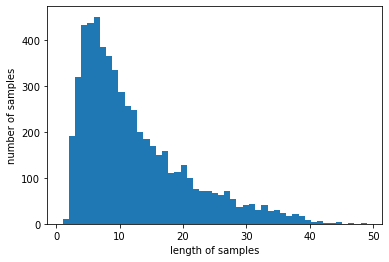

In [69]:
print('리뷰의 최대 길이 :',max(len(l) for l in xTrain))
print('리뷰의 평균 길이 :',sum(map(len, xTrain))/len(xTrain))
plt.hist([len(s) for s in xTrain], bins=max(len(l) for l in xTrain))
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [70]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [71]:
max_len = 40
below_threshold_len(max_len, xTrain)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 99.70969945355192


In [72]:
xTrain = pad_sequences(xTrain, maxlen = max_len)
xTest = pad_sequences(xTest, maxlen = max_len)

In [73]:
print(len(xTrain))
print(len(yTrain))

5856
5856


In [74]:
xTrain

array([[   0,    0,    0, ...,  513, 1833,  789],
       [   0,    0, 3519, ..., 1188,    1, 3521],
       [   0,    0,    0, ..., 1834,   36,   59],
       ...,
       [   0,    0,    0, ..., 1473, 3500,   53],
       [   0,    0,    0, ...,    1,  125,  263],
       [   0,    0,    0, ...,  382, 4722, 1203]])

In [75]:
def vs(seq):
    res = np.zeros((len(seq),len(yTrain))) 
    for i,sequence in enumerate(seq):
        res[i, sequence] = 1
                 
    return res

xTrain = vs(xTrain)
xTest = vs(xTest)

In [76]:
for i in range(len(yTrain)):
    if yTrain[i] == 'offensive':
        yTrain[i] = float(1)
      
    elif yTrain[i] == 'hate':
        yTrain[i] = float(2)
  
    elif yTrain[i] == 'none':
        yTrain[i] = float(0)
      
    else:
        pass
  

In [77]:
for i in range(len(yTest)):
    if yTest[i] == 'hate':
        yTest[i] = float(2)
      
    elif yTest[i] == 'offensive':
        yTest[i] = float(1)
      
    elif yTest[i] == 'none':
        yTest[i] = float(0)
      
    else:
        pass


In [78]:
yTrain = yTrain.astype(float)
yTrain

array([2., 1., 2., ..., 0., 0., 1.])

In [79]:
yTrain = keras.utils.to_categorical(yTrain, 3)
yTest = keras.utils.to_categorical(yTest, 3)

In [80]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [90]:
model = Sequential()
model.add(Embedding(len(xTrain),max_len))
model.add(LSTM(16))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 40)          234240    
_________________________________________________________________
lstm (LSTM)                  (None, 16)                3648      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 387       
Total params: 240,451
Trainable params: 240,451
Non-trainable params: 0
_________________________________________________________________


In [98]:
model = Sequential()
model.add(Dense(512,input_dim = len(xTrain),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               2998784   
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 195       
Total params: 3,146,755
Trainable params: 3,146,755
Non-trainable params: 0
_________________________________________________________________


In [99]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
adam = optimizers.Adam(lr = 0.0001)
sgd = optimizers.SGD(lr=0.1,decay=1e-6,momentum=0.9, nesterov = True)

In [100]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer = adam)
history = model.fit(xTrain, yTrain, epochs=10000, callbacks=[es, mc], batch_size=100, validation_split=0.2)

Epoch 1/10000
46/47 [============================>.] - ETA: 0s - loss: 1.0814 - acc: 0.4324
Epoch 00001: val_acc improved from -inf to 0.45137, saving model to best_model.h5
47/47 [==============================] - 1s 25ms/step - loss: 1.0815 - acc: 0.4325 - val_loss: 1.0593 - val_acc: 0.4514
Epoch 2/10000
45/47 [===========================>..] - ETA: 0s - loss: 1.0347 - acc: 0.4420
Epoch 00002: val_acc did not improve from 0.45137
47/47 [==============================] - 1s 19ms/step - loss: 1.0345 - acc: 0.4411 - val_loss: 1.0240 - val_acc: 0.4514
Epoch 3/10000
46/47 [============================>.] - ETA: 0s - loss: 0.9522 - acc: 0.5122
Epoch 00003: val_acc improved from 0.45137 to 0.52474, saving model to best_model.h5
47/47 [==============================] - 1s 21ms/step - loss: 0.9511 - acc: 0.5149 - val_loss: 0.9606 - val_acc: 0.5247
Epoch 4/10000
46/47 [============================>.] - ETA: 0s - loss: 0.8092 - acc: 0.6778
Epoch 00004: val_acc improved from 0.52474 to 0.55546, 

In [101]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(xTest, yTest)[1]))

79/79 [==============================] - 0s 3ms/step - loss: 0.9382 - acc: 0.5428

 테스트 정확도: 0.5428


In [102]:
pred = loaded_model.predict(xTest)
pred

array([[0.8252056 , 0.12612335, 0.04867098],
       [0.1308139 , 0.18190373, 0.6872823 ],
       [0.8540892 , 0.11190137, 0.03400935],
       ...,
       [0.8485976 , 0.11796437, 0.03343807],
       [0.5519911 , 0.2785936 , 0.16941527],
       [0.7445747 , 0.1913249 , 0.06410038]], dtype=float32)

In [103]:
yTest_decode = []
for i in range(len(pred)):
    val = yTest[i].argmax()
    yTest_decode.append(val)
len(yTest_decode)

2511

In [104]:
pred_decode = []
for i in range(len(yTest)):
    val = pred[i].argmax()
    pred_decode.append(val)
len(pred_decode)

2511

In [105]:
print('f1 : ',metrics.f1_score(yTest_decode, pred_decode, average='macro'))
print('accuracy', metrics.accuracy_score(yTest_decode, pred_decode))

f1 :  0.4999443797862737
accuracy 0.5428116288331342


In [106]:
# okt
# f1: 0.5471
# acc: 0.5753

In [272]:
# komoran
# f1: 0.5223
# acc: 0.5547

In [ ]:
# okt + LSTM(16) 
# f1:  0.5307
# accuracy: 0.5618